In [23]:
#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [2]:
motifs_df = pd.read_csv("../rosetta_motifs/motifs_rmsds.csv")

In [3]:
motifs_df

,system,rmsd,placement_pdb
0,aa2ar,4.147040,aa2ar_ResPos_159_ResID_PHE_Trio25_+_motif_1OU4...
1,abl1,0.124568,abl1_ResPos_83_ResID_THR_Trio42_+_motif_6DWM_H...
2,ace,0.407009,ace_ResPos_293_ResID_SER_Trio17_+_motif_7Q26_8...
3,aces,0.133846,aces_ResPos_52_ResID_TRP_Trio65_+_motif_7AIX_8...
4,ada,0.272664,ada_ResPos_151_ResID_MET_Trio38_+_motif_3UZC_T...
...,...,...,...
80,thb,0.165592,thb_ResPos_115_ResID_LEU_Trio20_+_motif_4A6E_A...
81,thrb,0.214373,thrb_ResPos_111_ResID_LEU_Trio18_+_motif_5AFJ_...
82,tryb1,0.429380,tryb1_ResPos_209_ResID_GLU_Trio49_+_motif_5F6D...
83,urok,0.160134,urok_ResPos_208_ResID_CYS_Trio60_+_motif_2A1D_...


In [6]:
ad_df = pd.read_csv("../AutoDock_Vina/ADV_best_rmsds.csv",header=None)

In [7]:
ad_df

,0,1
0,aa2ar,2.403411
1,abl1,0.220222
2,ace,1.308332
3,aces,0.458188
4,ada,4.494674
...,...,...
97,tysy,1.448866
98,urok,0.757082
99,vgfr2,0.734574
100,wee1,0.645238


In [10]:
#ad_df = ad_df.rename(columns={'0': 'system', '1': 'rmsd'})
ad_df.columns = ['system', 'rmsd']

In [11]:
ad_df

,system,rmsd
0,aa2ar,2.403411
1,abl1,0.220222
2,ace,1.308332
3,aces,0.458188
4,ada,4.494674
...,...,...
97,tysy,1.448866
98,urok,0.757082
99,vgfr2,0.734574
100,wee1,0.645238


In [18]:
merged_df = pd.merge(motifs_df, ad_df, on='system', how='inner')

In [19]:
merged_df

,system,rmsd_x,placement_pdb,rmsd_y
0,aa2ar,4.147040,aa2ar_ResPos_159_ResID_PHE_Trio25_+_motif_1OU4...,2.403411
1,abl1,0.124568,abl1_ResPos_83_ResID_THR_Trio42_+_motif_6DWM_H...,0.220222
2,ace,0.407009,ace_ResPos_293_ResID_SER_Trio17_+_motif_7Q26_8...,1.308332
3,aces,0.133846,aces_ResPos_52_ResID_TRP_Trio65_+_motif_7AIX_8...,0.458188
4,ada,0.272664,ada_ResPos_151_ResID_MET_Trio38_+_motif_3UZC_T...,4.494674
...,...,...,...,...
80,thb,0.165592,thb_ResPos_115_ResID_LEU_Trio20_+_motif_4A6E_A...,0.737146
81,thrb,0.214373,thrb_ResPos_111_ResID_LEU_Trio18_+_motif_5AFJ_...,0.281836
82,tryb1,0.429380,tryb1_ResPos_209_ResID_GLU_Trio49_+_motif_5F6D...,0.513567
83,urok,0.160134,urok_ResPos_208_ResID_CYS_Trio60_+_motif_2A1D_...,0.757082


In [20]:
merged_df = merged_df.drop(columns=['placement_pdb'])
merged_df.columns = ['system', 'rmsd_motifs', 'rmsd_adv']

In [21]:
merged_df

,system,rmsd_motifs,rmsd_adv
0,aa2ar,4.147040,2.403411
1,abl1,0.124568,0.220222
2,ace,0.407009,1.308332
3,aces,0.133846,0.458188
4,ada,0.272664,4.494674
...,...,...,...
80,thb,0.165592,0.737146
81,thrb,0.214373,0.281836
82,tryb1,0.429380,0.513567
83,urok,0.160134,0.757082


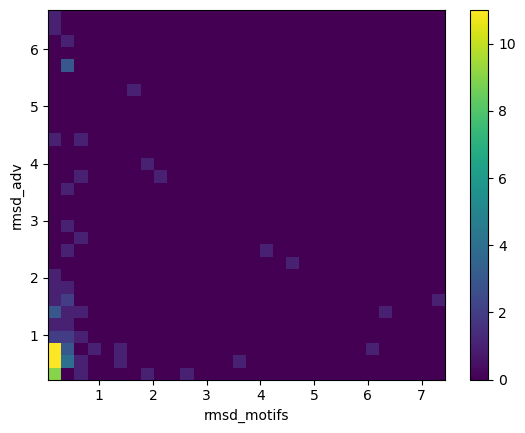

In [25]:
x = merged_df['rmsd_motifs']
y = merged_df['rmsd_adv']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('rmsd_motifs')
plt.ylabel('rmsd_adv')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis', aspect='auto')

plt.colorbar()

#plt.grid(True)
#plt.xlim(150,600)
plt.show()

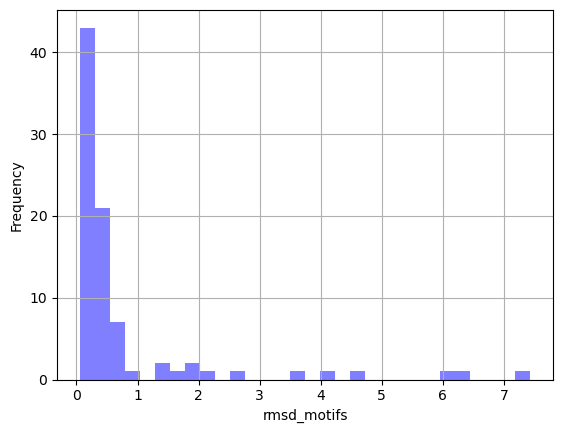

In [27]:
x = merged_df['rmsd_motifs']
plt.xlabel('rmsd_motifs')
plt.ylabel('Frequency')
plt.hist(x, bins=30, color='blue', alpha=0.5)
plt.grid(True)
plt.show()

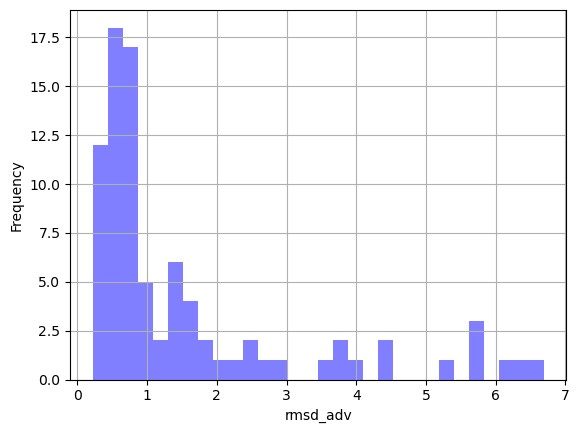

In [29]:
x = merged_df['rmsd_adv']
plt.xlabel('rmsd_adv')
plt.ylabel('Frequency')
plt.hist(x, bins=30, color='blue', alpha=0.5)
plt.grid(True)
plt.show()